In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [5]:
df.head()


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [6]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

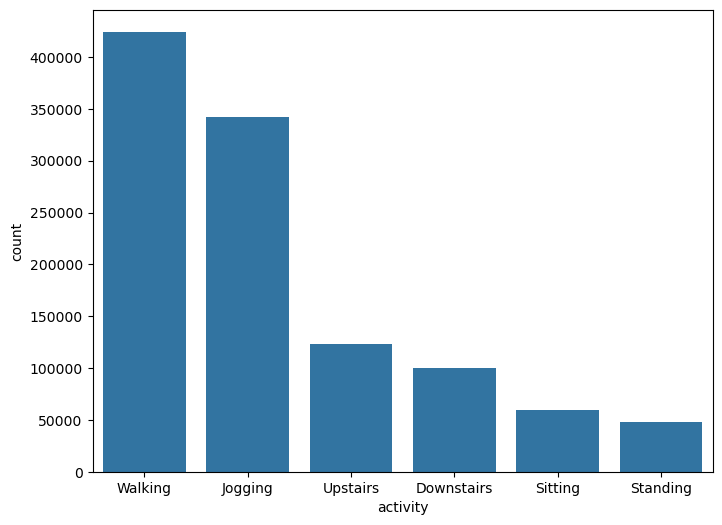

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)
     

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_10414/1793805087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_10414/1793805087.py:2: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


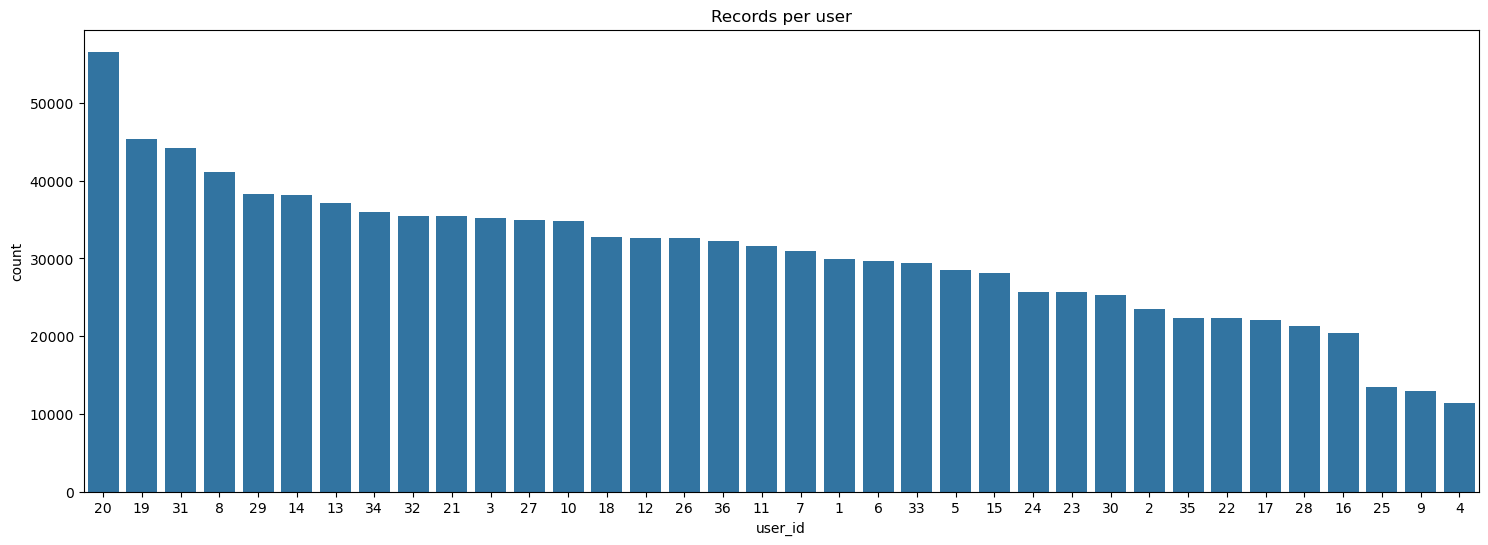

In [8]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

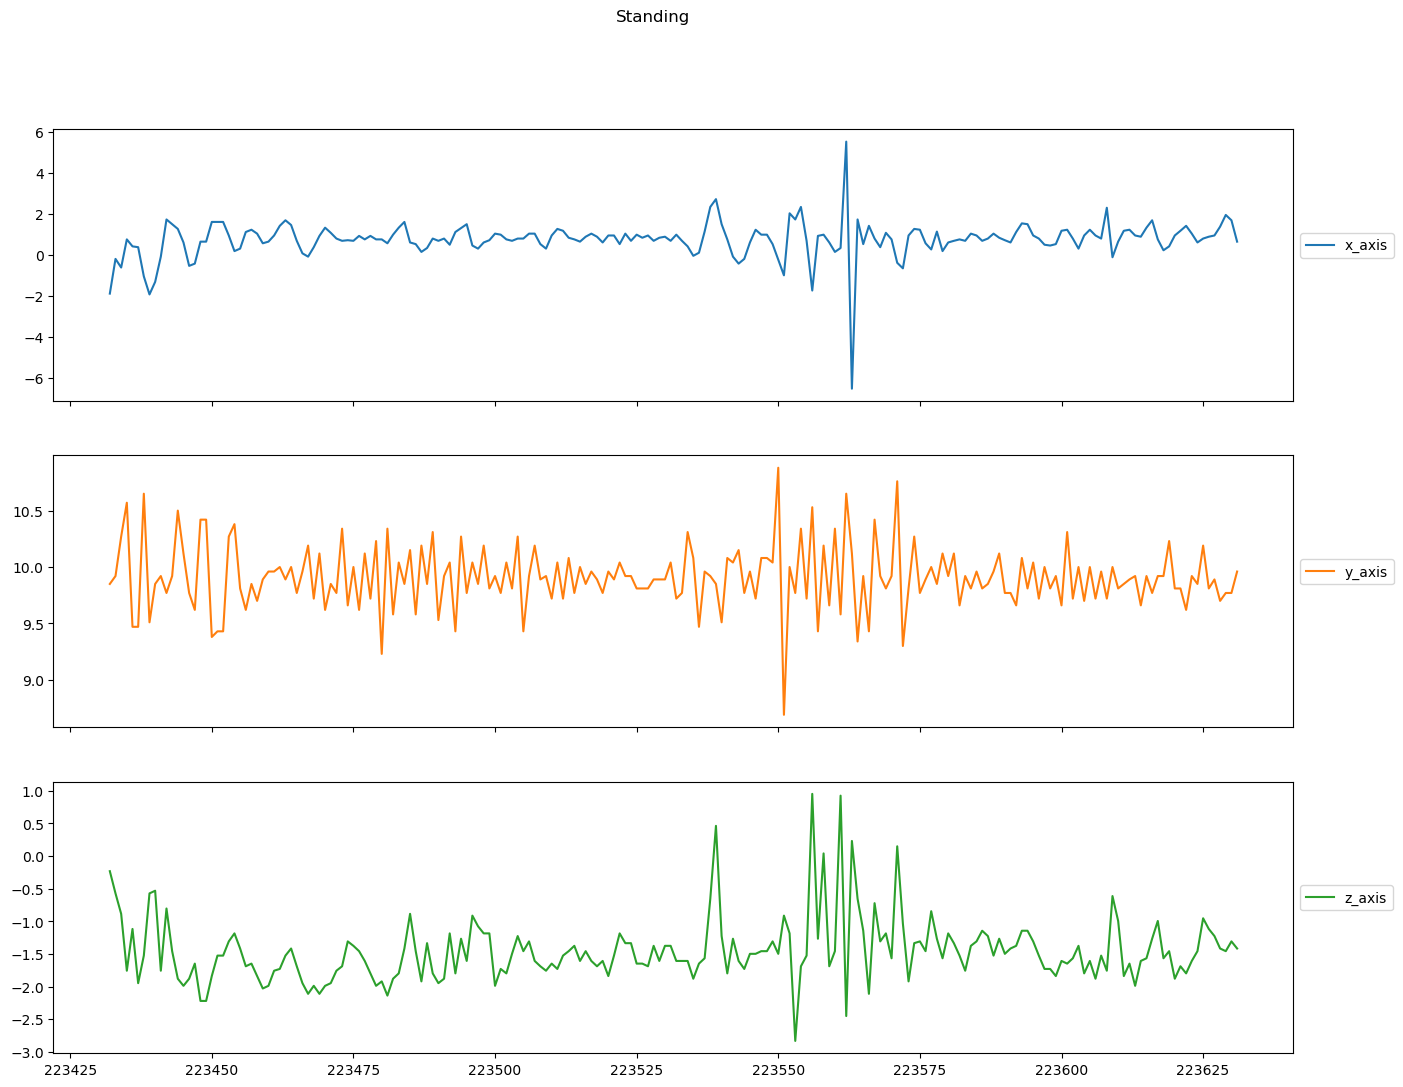

In [9]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)

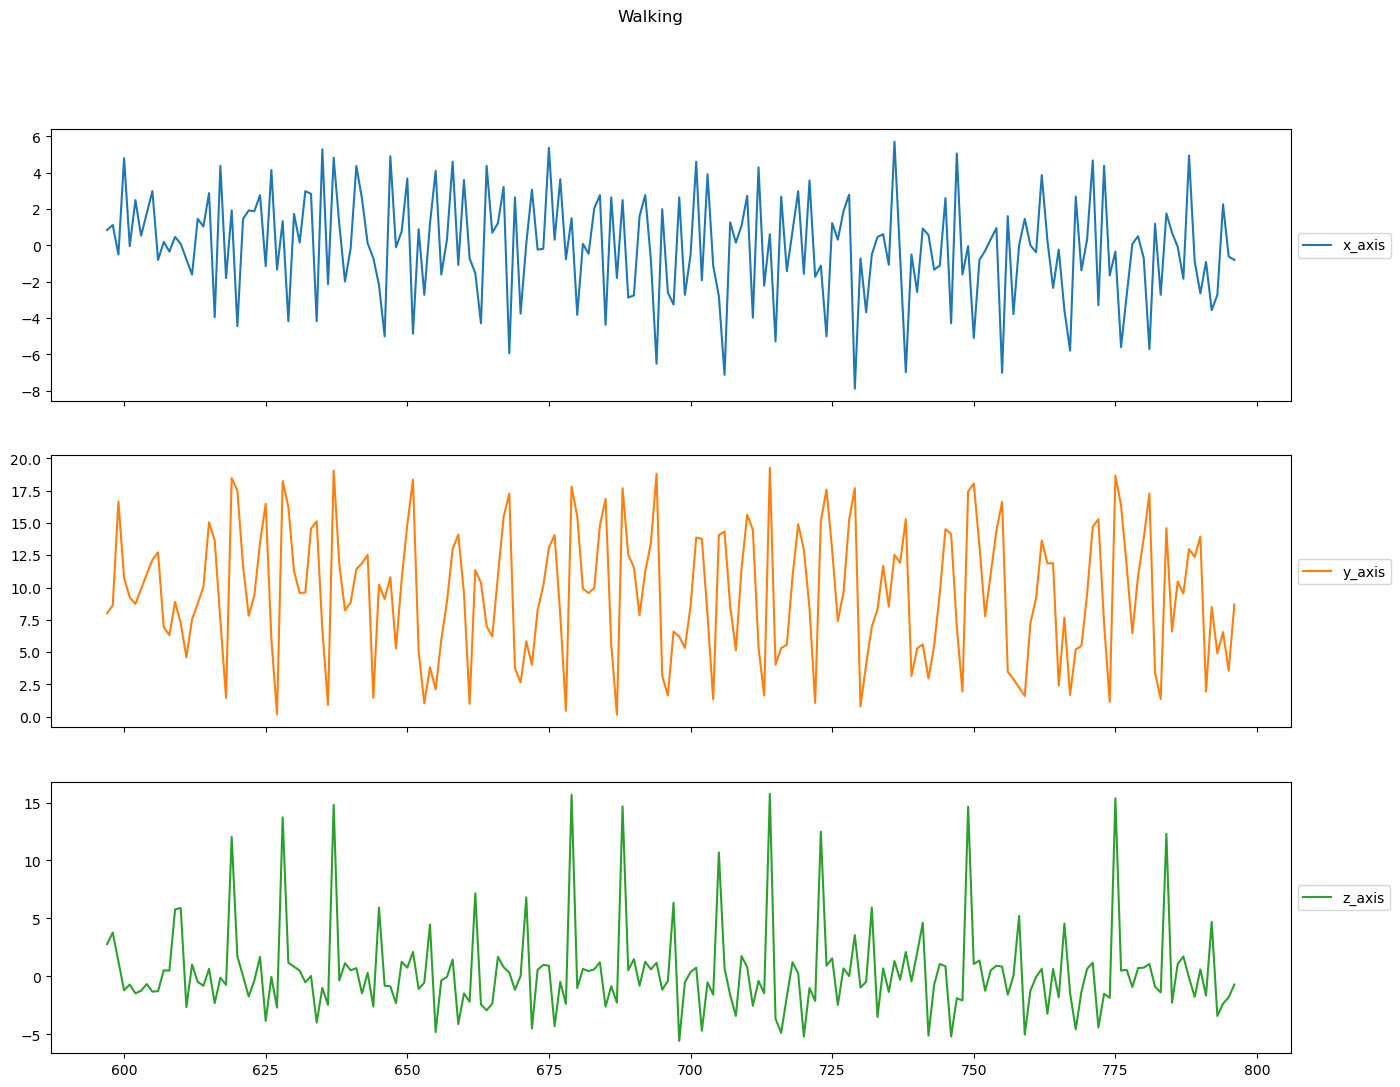

In [10]:
plot_activity("Walking", df)

In [11]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [12]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [13]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [15]:
#Epoch 500

BATCH_SIZE = 16

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

In [16]:
#32-512
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 194, 32)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 188, 512)          115200    
                                                                 
 dropout (Dropout)           (None, 188, 512)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 512)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                217080    
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                      

In [17]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 15:33:37.846887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-06 15:33:38.908675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:33:39.123046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:33:39.877699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.7613

2024-05-06 15:33:58.115588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:33:58.192330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.6979 - accuracy: 0.7613 - val_loss: 0.4746 - val_accuracy: 0.8247
Epoch 2/20
275/275 [==============================] - 14s 50ms/step - loss: 0.3959 - accuracy: 0.8531 - val_loss: 0.3629 - val_accuracy: 0.8689
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2609 - accuracy: 0.9046 - val_loss: 0.2292 - val_accuracy: 0.9144
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1826 - accuracy: 0.9352 - val_loss: 0.1991 - val_accuracy: 0.9253
Epoch 5/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1828 - accuracy: 0.9387 - val_loss: 0.1481 - val_accuracy: 0.9419
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1316 - accuracy: 0.9561 - val_loss: 0.0976 - val_accuracy: 0.9699
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.0981 - accuracy: 0.9678 - val_loss: 0.0955 - val_accuracy: 0.9649
Epo

2024-05-06 15:38:42.064001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:38:42.133627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 18ms/step
f1_score =  0.9854819878509969
0.9854307047896558
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.94      0.98      0.96       614
           3       0.97      0.95      0.96       502
           4       0.99      0.96      0.98       300
           5       0.95      0.99      0.97       242

    accuracy                           0.99      5491
   macro avg       0.97      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

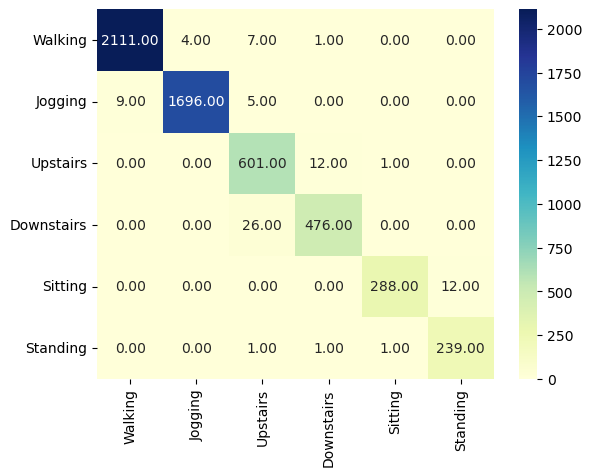

In [18]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [19]:
#16-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_3 (Conv1D)           (None, 188, 32)           3616      
                                                                 
 dropout_2 (Dropout)         (None, 188, 32)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 94, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 90)                44280     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                      

In [20]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 15:39:39.628602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:39:39.806490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:39:40.457370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7437 - accuracy: 0.7380

2024-05-06 15:39:56.570498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:39:56.645247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 58ms/step - loss: 0.7437 - accuracy: 0.7380 - val_loss: 0.5671 - val_accuracy: 0.7750
Epoch 2/20
275/275 [==============================] - 12s 42ms/step - loss: 0.3974 - accuracy: 0.8453 - val_loss: 0.5057 - val_accuracy: 0.7860
Epoch 3/20
275/275 [==============================] - 12s 42ms/step - loss: 0.3062 - accuracy: 0.8772 - val_loss: 0.4222 - val_accuracy: 0.8529
Epoch 4/20
275/275 [==============================] - 12s 43ms/step - loss: 0.2498 - accuracy: 0.9041 - val_loss: 0.3028 - val_accuracy: 0.8839
Epoch 5/20
275/275 [==============================] - 12s 43ms/step - loss: 0.2050 - accuracy: 0.9254 - val_loss: 0.3523 - val_accuracy: 0.8593
Epoch 6/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1646 - accuracy: 0.9427 - val_loss: 0.2467 - val_accuracy: 0.9153
Epoch 7/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1547 - accuracy: 0.9453 - val_loss: 0.1553 - val_accuracy: 0.9426
Epo

2024-05-06 15:47:04.740252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:47:04.807906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 18ms/step
f1_score =  0.9700161041509687
0.9692223638681479
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.94      0.97      1710
           2       0.82      0.96      0.89       614
           3       0.95      0.94      0.94       502
           4       0.99      0.98      0.98       300
           5       0.98      1.00      0.99       242

    accuracy                           0.97      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

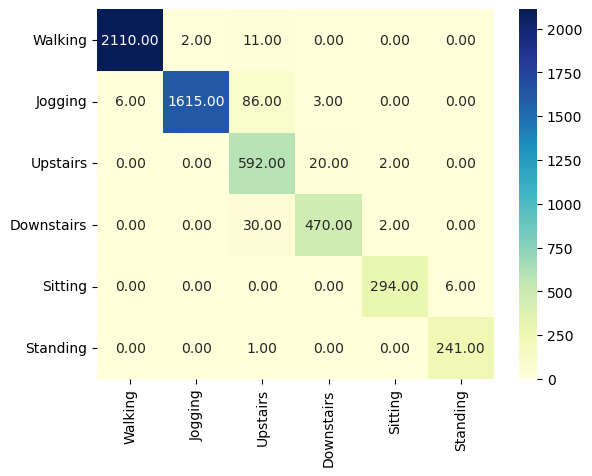

In [21]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [22]:
#16-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_5 (Conv1D)           (None, 188, 64)           7232      
                                                                 
 dropout_4 (Dropout)         (None, 188, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [23]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 15:47:53.446539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:47:53.625813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:47:54.259394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7173 - accuracy: 0.7548

2024-05-06 15:48:11.179607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:48:11.262322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.7173 - accuracy: 0.7548 - val_loss: 0.4689 - val_accuracy: 0.8297
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.4299 - accuracy: 0.8362 - val_loss: 0.4007 - val_accuracy: 0.8427
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.3037 - accuracy: 0.8831 - val_loss: 0.3596 - val_accuracy: 0.8673
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2248 - accuracy: 0.9161 - val_loss: 0.3320 - val_accuracy: 0.8818
Epoch 5/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1917 - accuracy: 0.9335 - val_loss: 0.1464 - val_accuracy: 0.9542
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1438 - accuracy: 0.9520 - val_loss: 0.1319 - val_accuracy: 0.9561
Epoch 7/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1250 - accuracy: 0.9562 - val_loss: 0.2232 - val_accuracy: 0.9271
Epo

2024-05-06 15:55:08.343877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:55:08.417289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9881850767699948
0.9881624476415953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      1.00      1.00      1710
           2       0.97      0.96      0.97       614
           3       0.95      0.98      0.97       502
           4       0.99      0.95      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

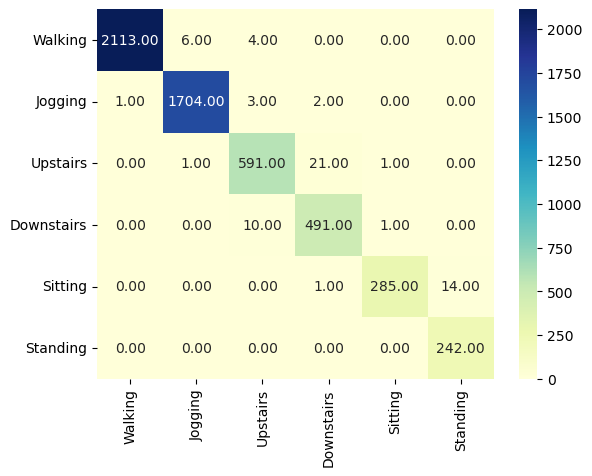

In [24]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# Dense re_tunning

In [25]:
#16-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(80,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_7 (Conv1D)           (None, 188, 64)           7232      
                                                                 
 dropout_6 (Dropout)         (None, 188, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [26]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 15:55:40.002816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:55:40.188249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:55:40.867736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.7621

2024-05-06 15:55:57.529762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 15:55:57.609708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.6928 - accuracy: 0.7621 - val_loss: 0.4372 - val_accuracy: 0.8281
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.3819 - accuracy: 0.8567 - val_loss: 0.3386 - val_accuracy: 0.8579
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2777 - accuracy: 0.8933 - val_loss: 0.2583 - val_accuracy: 0.9201
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2174 - accuracy: 0.9207 - val_loss: 0.2076 - val_accuracy: 0.9331
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1845 - accuracy: 0.9343 - val_loss: 0.2473 - val_accuracy: 0.9117
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1507 - accuracy: 0.9484 - val_loss: 0.2406 - val_accuracy: 0.9078
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1289 - accuracy: 0.9561 - val_loss: 0.1224 - val_accuracy: 0.9579
Epo

2024-05-06 16:00:02.724110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:00:02.823633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 18ms/step
f1_score =  0.9762958306636641
0.975960662902932
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.90      0.96      0.93       614
           3       0.92      0.97      0.94       502
           4       0.99      0.97      0.98       300
           5       0.97      0.99      0.98       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

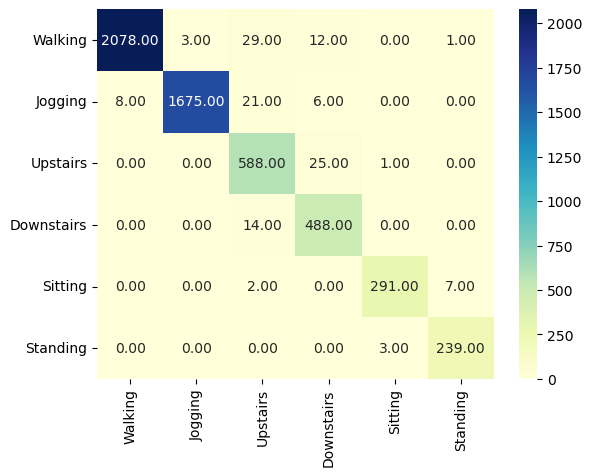

In [27]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [28]:
#16-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(90,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_9 (Conv1D)           (None, 188, 64)           7232      
                                                                 
 dropout_8 (Dropout)         (None, 188, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [29]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 16:00:45.186934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:00:45.377500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:00:46.041969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.7604

2024-05-06 16:01:03.123587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:01:03.211006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 63ms/step - loss: 0.6958 - accuracy: 0.7604 - val_loss: 0.4242 - val_accuracy: 0.8345
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3883 - accuracy: 0.8497 - val_loss: 0.3862 - val_accuracy: 0.8456
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2918 - accuracy: 0.8839 - val_loss: 0.3373 - val_accuracy: 0.8773
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2810 - accuracy: 0.8947 - val_loss: 0.4175 - val_accuracy: 0.8604
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2075 - accuracy: 0.9302 - val_loss: 0.1944 - val_accuracy: 0.9267
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1543 - accuracy: 0.9479 - val_loss: 0.2047 - val_accuracy: 0.9271
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1327 - accuracy: 0.9570 - val_loss: 0.3335 - val_accuracy: 0.8966
Epo

2024-05-06 16:08:36.913504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:08:36.995397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.984211507549502
0.9841558914587507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.96      0.94      0.95       614
           3       0.93      0.97      0.95       502
           4       0.99      0.98      0.98       300
           5       0.97      0.99      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.98      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

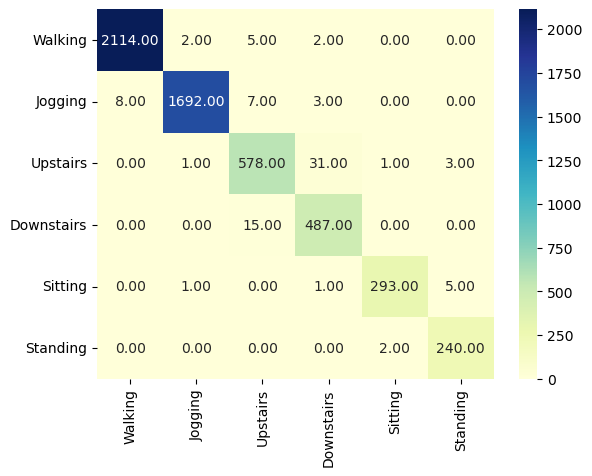

In [30]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [31]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 194, 16)           352       
                                                                 
 conv1d_11 (Conv1D)          (None, 188, 64)           7232      
                                                                 
 dropout_10 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_11 (Dropout)        (None, 90)                0         
                                                      

In [32]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 16:09:38.031435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:09:38.236488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:09:38.897054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7047 - accuracy: 0.7542

2024-05-06 16:09:56.275531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 16:09:56.356097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7047 - accuracy: 0.7542 - val_loss: 0.5750 - val_accuracy: 0.7748
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3807 - accuracy: 0.8513 - val_loss: 0.3305 - val_accuracy: 0.8725
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2764 - accuracy: 0.8915 - val_loss: 0.6117 - val_accuracy: 0.7643
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2372 - accuracy: 0.9114 - val_loss: 0.1872 - val_accuracy: 0.9294
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1726 - accuracy: 0.9340 - val_loss: 0.1549 - val_accuracy: 0.9403
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1466 - accuracy: 0.9483 - val_loss: 0.5314 - val_accuracy: 0.8081
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1316 - accuracy: 0.9546 - val_loss: 0.0970 - val_accuracy: 0.9704
Epo

2024-05-07 01:32:21.506124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:32:21.591929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9775162697195141
0.9772354762338372
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.97      0.91      0.94       614
           3       0.86      0.98      0.92       502
           4       0.99      0.97      0.98       300
           5       0.97      1.00      0.98       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

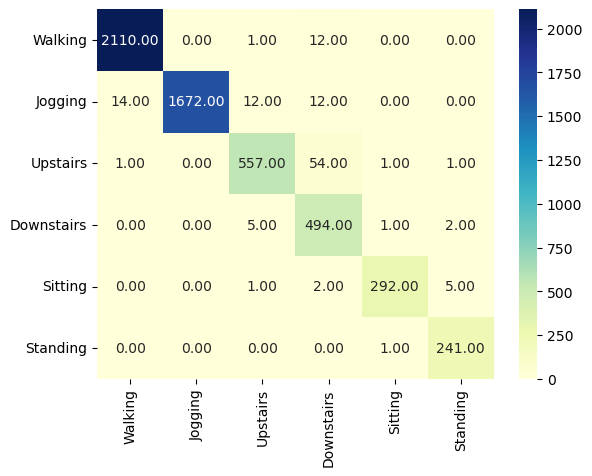

In [33]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [34]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(110,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 194, 16)           352       
                                                                 
 conv1d_13 (Conv1D)          (None, 188, 64)           7232      
                                                                 
 dropout_12 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [35]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-07 01:33:07.306681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:33:07.506030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:33:08.169883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.7495

2024-05-07 01:33:25.482245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:33:25.574816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7139 - accuracy: 0.7495 - val_loss: 0.5276 - val_accuracy: 0.8083
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.4250 - accuracy: 0.8375 - val_loss: 0.3531 - val_accuracy: 0.8622
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3136 - accuracy: 0.8781 - val_loss: 0.4113 - val_accuracy: 0.8561
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2219 - accuracy: 0.9160 - val_loss: 0.1848 - val_accuracy: 0.9312
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1721 - accuracy: 0.9391 - val_loss: 0.1966 - val_accuracy: 0.9353
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1487 - accuracy: 0.9481 - val_loss: 0.1175 - val_accuracy: 0.9599
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1110 - accuracy: 0.9623 - val_loss: 0.1736 - val_accuracy: 0.9315
Epo

2024-05-07 01:37:49.853376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:37:49.927431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9824156299530351
0.9823347295574577
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.98      0.92      0.95       614
           3       0.90      0.99      0.94       502
           4       0.97      0.96      0.96       300
           5       0.97      0.96      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

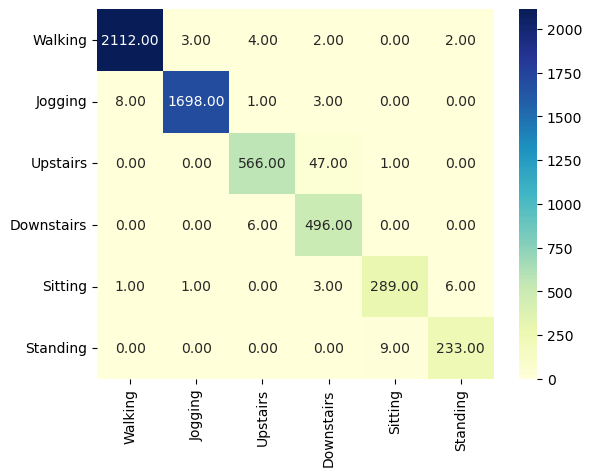

In [36]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [37]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(120,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 194, 16)           352       
                                                                 
 conv1d_15 (Conv1D)          (None, 188, 64)           7232      
                                                                 
 dropout_14 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [38]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-07 01:38:31.174154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:38:31.375439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:38:32.106739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.7625

2024-05-07 01:38:50.048741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:38:50.138526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.6842 - accuracy: 0.7625 - val_loss: 0.3843 - val_accuracy: 0.8445
Epoch 2/20
275/275 [==============================] - 14s 49ms/step - loss: 0.3697 - accuracy: 0.8515 - val_loss: 0.3153 - val_accuracy: 0.8755
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2724 - accuracy: 0.8874 - val_loss: 0.2681 - val_accuracy: 0.9023
Epoch 4/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2250 - accuracy: 0.9140 - val_loss: 0.2581 - val_accuracy: 0.9078
Epoch 5/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1721 - accuracy: 0.9389 - val_loss: 0.1429 - val_accuracy: 0.9522
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1293 - accuracy: 0.9567 - val_loss: 0.1137 - val_accuracy: 0.9627
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1190 - accuracy: 0.9607 - val_loss: 0.1217 - val_accuracy: 0.9526
Epo

2024-05-07 01:46:38.232271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:46:38.304829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9825771860072035
0.9825168457475869
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.96      0.95      0.95       614
           3       0.93      0.98      0.95       502
           4       1.00      0.94      0.97       300
           5       0.94      0.99      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

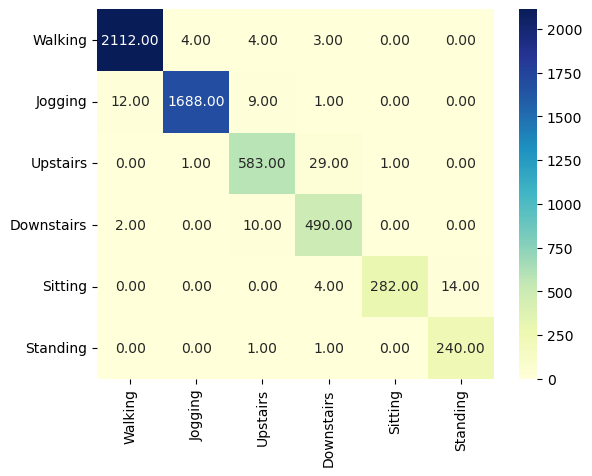

In [39]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [40]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(130,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 194, 16)           352       
                                                                 
 conv1d_17 (Conv1D)          (None, 188, 64)           7232      
                                                                 
 dropout_16 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_17 (Dropout)        (None, 90)                0         
                                                      

In [41]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-07 01:47:07.729169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:47:07.930417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:47:08.599232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.7505

2024-05-07 01:47:26.206472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:47:26.291372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.7321 - accuracy: 0.7505 - val_loss: 0.6288 - val_accuracy: 0.7368
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3958 - accuracy: 0.8424 - val_loss: 0.6889 - val_accuracy: 0.7302
Epoch 3/20
275/275 [==============================] - 14s 51ms/step - loss: 0.3008 - accuracy: 0.8743 - val_loss: 0.2913 - val_accuracy: 0.8802
Epoch 4/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2483 - accuracy: 0.9044 - val_loss: 0.3351 - val_accuracy: 0.8770
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2037 - accuracy: 0.9246 - val_loss: 0.2831 - val_accuracy: 0.8839
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1663 - accuracy: 0.9407 - val_loss: 0.1951 - val_accuracy: 0.9383
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1352 - accuracy: 0.9539 - val_loss: 0.1159 - val_accuracy: 0.9633
Epo

2024-05-07 01:52:20.057272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:52:20.133590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9833428942302318
0.9832453105081042
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.96      0.95      0.96       614
           3       0.92      0.97      0.94       502
           4       1.00      0.94      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

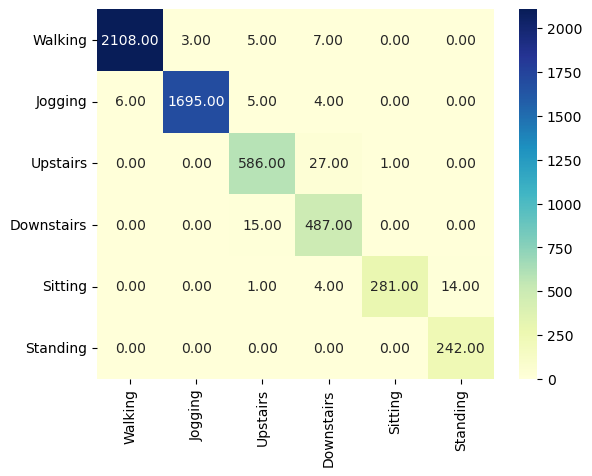

In [42]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [47]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu',strides=2, input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu',strides=2))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(130,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 97, 16)            352       
                                                                 
 conv1d_25 (Conv1D)          (None, 46, 64)            7232      
                                                                 
 dropout_22 (Dropout)        (None, 46, 64)            0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 23, 64)           0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_23 (Dropout)        (None, 90)                0         
                                                     

In [48]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-07 01:56:05.153295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:56:05.582372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:56:05.841198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.7727

2024-05-07 01:56:13.776385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:56:13.867021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 11s 31ms/step - loss: 0.6405 - accuracy: 0.7727 - val_loss: 0.3533 - val_accuracy: 0.8643
Epoch 2/20
275/275 [==============================] - 7s 25ms/step - loss: 0.3259 - accuracy: 0.8689 - val_loss: 0.2273 - val_accuracy: 0.9073
Epoch 3/20
275/275 [==============================] - 7s 25ms/step - loss: 0.2401 - accuracy: 0.9045 - val_loss: 0.1772 - val_accuracy: 0.9344
Epoch 4/20
275/275 [==============================] - 7s 25ms/step - loss: 0.1837 - accuracy: 0.9319 - val_loss: 0.1225 - val_accuracy: 0.9561
Epoch 5/20
275/275 [==============================] - 7s 25ms/step - loss: 0.1563 - accuracy: 0.9448 - val_loss: 0.1551 - val_accuracy: 0.9433
Epoch 6/20
275/275 [==============================] - 7s 25ms/step - loss: 0.1302 - accuracy: 0.9551 - val_loss: 0.0971 - val_accuracy: 0.9640
Epoch 7/20
275/275 [==============================] - 7s 25ms/step - loss: 0.1105 - accuracy: 0.9610 - val_loss: 0.0759 - val_accuracy: 0.9736
Epoch 8/2

2024-05-07 01:59:25.549105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-07 01:59:25.629512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 2s 7ms/step
f1_score =  0.9823443651331147
0.9823347295574577
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.96      0.97      0.96       614
           3       0.97      0.96      0.96       502
           4       1.00      0.92      0.95       300
           5       0.91      1.00      0.95       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

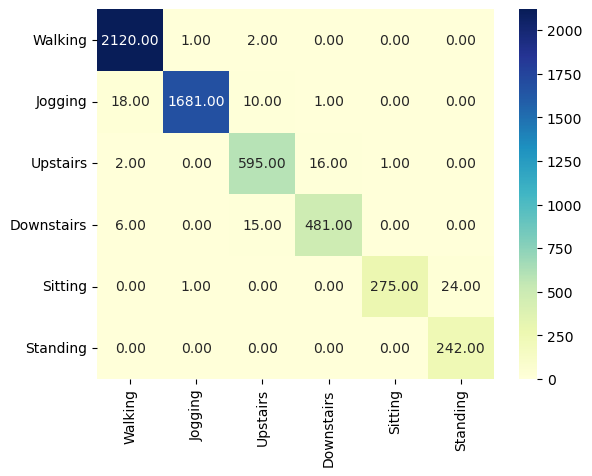

In [49]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')